In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

2023-09-28 10:45:12.034862: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-28 10:45:12.046467: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 10:45:12.150799: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 10:45:12.152407: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 10:45:12.825625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# os.chdir('bumblebee-test')
# if os.path.isdir('train/barbutellus') is False:
#     os.makedirs('train/barbutellus')
#     os.makedirs('train/bohemicus')
#     os.makedirs('train/campestris')
#     os.makedirs('train/cryptarum')
#     os.makedirs('train/distinguendus')
#     os.makedirs('train/hortorum')
#     os.makedirs('test/barbutellus')
#     os.makedirs('test/bohemicus')
#     os.makedirs('test/campestris')
#     os.makedirs('test/cryptarum')
#     os.makedirs('test/distinguendus')
#     os.makedirs('test/hortorum')
#     os.makedirs('validate/barbutellus')
#     os.makedirs('validate/bohemicus')
#     os.makedirs('validate/campestris')
#     os.makedirs('validate/cryptarum')
#     os.makedirs('validate/distinguendus')
#     os.makedirs('validate/hortorum')
    
#     for i in random.sample(glob.glob('*barbutellus*'), 20):
#         shutil.move(i, 'train/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 20):
#         shutil.move(i, 'train/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 20):
#         shutil.move(i, 'train/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 20):
#         shutil.move(i, 'train/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 20):
#         shutil.move(i, 'train/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 20):
#         shutil.move(i, 'train/hortorum')
#     for i in random.sample(glob.glob('*barbutellus*'), 6):
#         shutil.move(i, 'validate/barbutellus')   
#     for i in random.sample(glob.glob('*bohemicus*'), 6):
#         shutil.move(i, 'validate/bohemicus')    
#     for i in random.sample(glob.glob('*campestris*'), 6):
#         shutil.move(i, 'validate/campestris') 
#     for i in random.sample(glob.glob('*cryptarum*'), 6):
#         shutil.move(i, 'validate/cryptarum') 
#     for i in random.sample(glob.glob('*distinguendus*'), 6):
#         shutil.move(i, 'validate/distinguendus') 
#     for i in random.sample(glob.glob('*hortorum*'), 6):
#         shutil.move(i, 'validate/hortorum') 
#     for i in random.sample(glob.glob('*barbutellus*'), 5):
#         shutil.move(i, 'test/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 5):
#         shutil.move(i, 'test/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 5):
#         shutil.move(i, 'test/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 5):
#         shutil.move(i, 'test/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 5):
#         shutil.move(i, 'test/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 5):
#         shutil.move(i, 'test/hortorum')

# os.chdir('../../')

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [11]:
train_path = 'bumblebee-test/train'
validate_path = 'bumblebee-test/validate'
test_path = 'bumblebee-test/test'

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10)
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum'], batch_size=10, shuffle=False)

Found 120 images belonging to 6 classes.
Found 36 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [13]:
imgs, labels = next(train_batches)

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

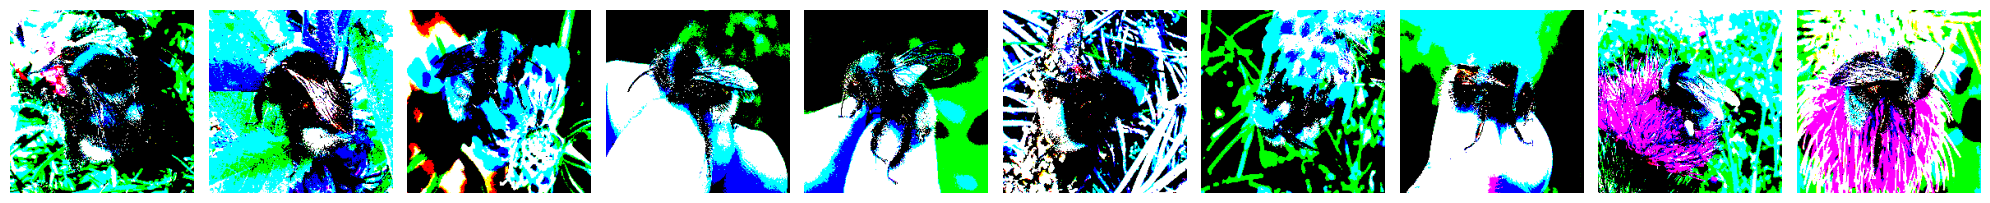

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [15]:
plotImages(imgs)
print(labels)

In [16]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 6)                 1

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=validate_batches,
    validation_steps=len(validate_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
12/12 - 2s - loss: 116.3351 - accuracy: 0.1333 - val_loss: 76.0883 - val_accuracy: 0.2500 - 2s/epoch - 161ms/step
Epoch 2/10
12/12 - 1s - loss: 27.0236 - accuracy: 0.5417 - val_loss: 41.0850 - val_accuracy: 0.2500 - 1s/epoch - 116ms/step
Epoch 3/10
12/12 - 1s - loss: 6.6682 - accuracy: 0.7500 - val_loss: 23.8520 - val_accuracy: 0.4722 - 1s/epoch - 114ms/step
Epoch 4/10
12/12 - 1s - loss: 1.3956 - accuracy: 0.9250 - val_loss: 18.5210 - val_accuracy: 0.4167 - 1s/epoch - 115ms/step
Epoch 5/10
12/12 - 1s - loss: 1.2286 - accuracy: 0.9333 - val_loss: 15.4214 - val_accuracy: 0.5000 - 1s/epoch - 116ms/step
Epoch 6/10
12/12 - 1s - loss: 0.1686 - accuracy: 0.9750 - val_loss: 15.6423 - val_accuracy: 0.5278 - 1s/epoch - 112ms/step
Epoch 7/10
12/12 - 1s - loss: 0.1519 - accuracy: 0.9833 - val_loss: 14.7291 - val_accuracy: 0.4444 - 1s/epoch - 111ms/step
Epoch 8/10
12/12 - 1s - loss: 0.1551 - accuracy: 0.9833 - val_loss: 16.6651 - val_accuracy: 0.5556 - 1s/epoch - 113ms/step
Epoch 9/10
12

In [21]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

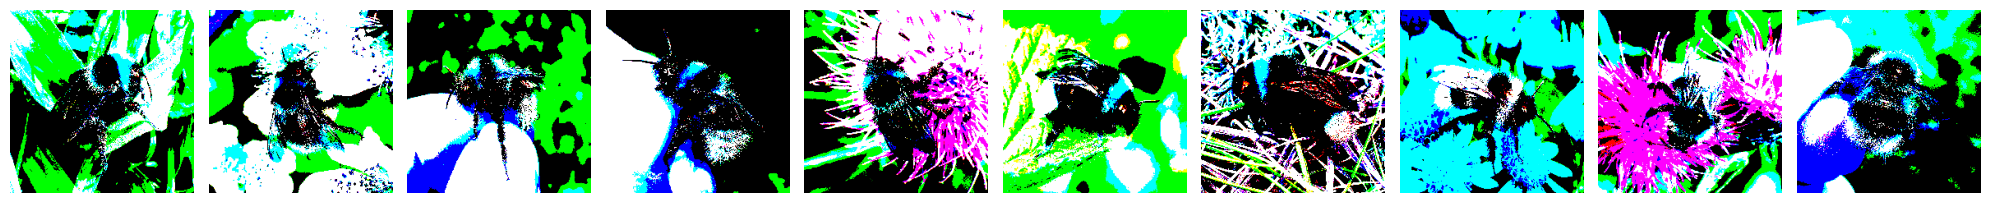

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [22]:
plotImages(test_imgs)
print(test_labels)

In [23]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [25]:
import numpy as np
np.round(predictions)

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=flo

In [26]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
test_batches.class_indices

{'barbutellus': 0,
 'bohemicus': 1,
 'campestris': 2,
 'cryptarum': 3,
 'distinguendus': 4,
 'hortorum': 5}

Confusion matrix, without normalization
[[1 0 0 0 1 3]
 [0 2 1 0 2 0]
 [0 2 0 0 2 1]
 [0 1 1 0 2 1]
 [0 0 0 0 4 1]
 [0 0 1 0 1 3]]


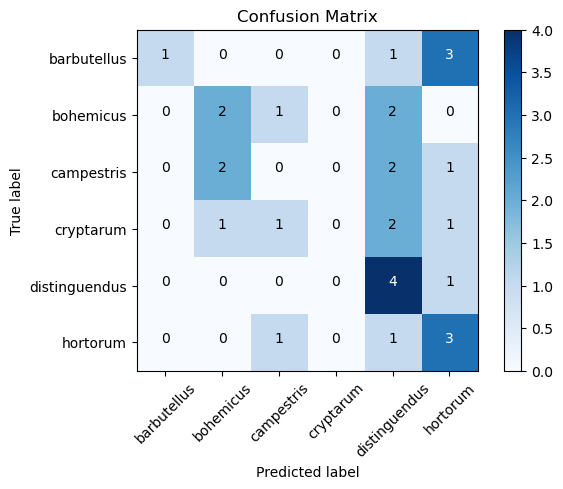

In [29]:
cm_plot_labels = ['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 'hortorum']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')